In [43]:
#1. Import Libraries

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [44]:
#2. Load and Preprocess the data
(X_train, y_train), (X_test, y_test)= mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [45]:
def plot_input_img(i):
    plt.imshow(X_train[0], cmap = 'binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

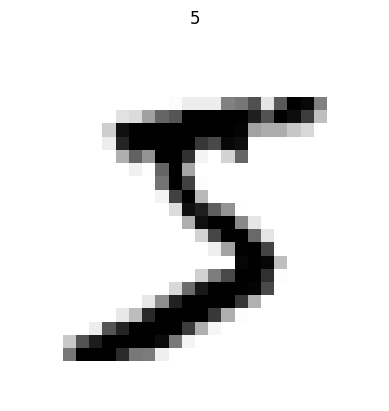

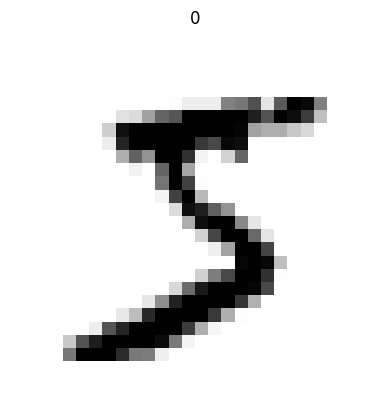

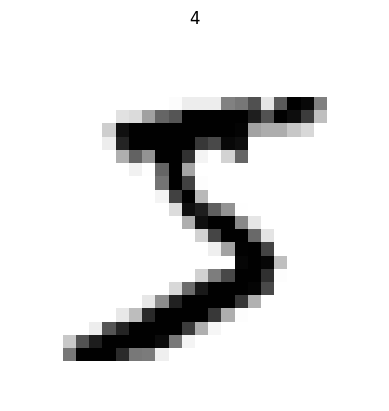

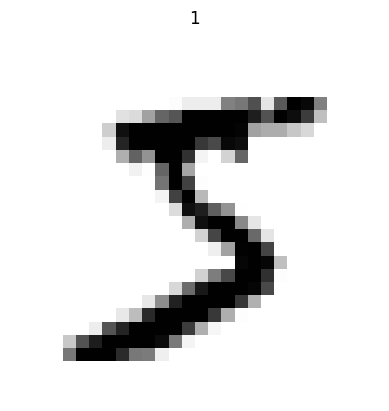

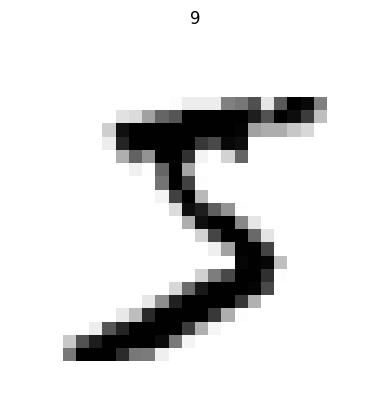

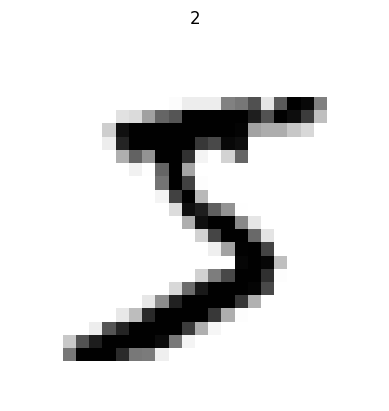

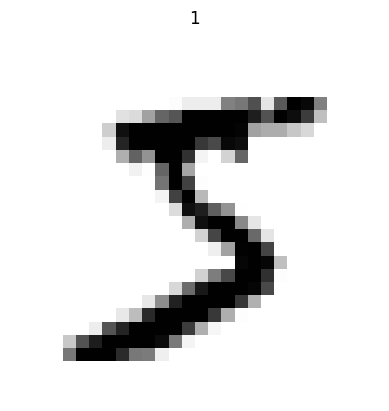

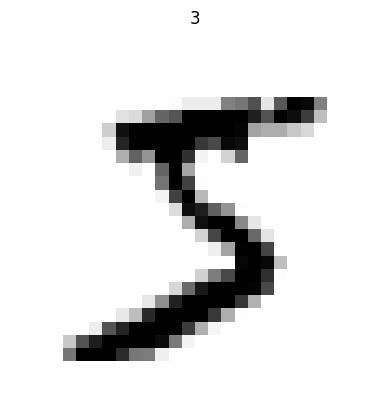

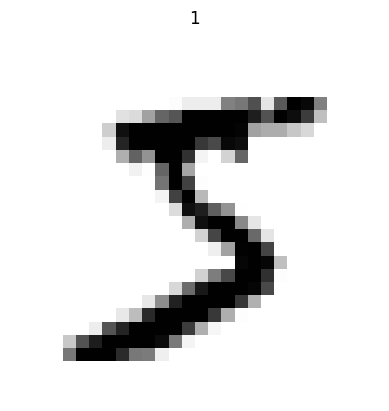

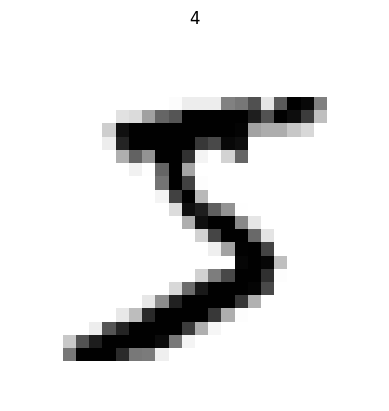

In [46]:
for i in range(10):
    plot_input_img(i)

In [47]:
#3. Preprocess the images

#Normalizing the image to [0,1] range
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

#Reshape the dimensions of images to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

#Convert classes to one hot vector

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [49]:
#4 Building the model
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'softmax'))
model.summary()




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [50]:
#4.1 Compile the model
model.compile(optimizer= 'adam' , loss = keras.losses.categorical_crossentropy , metrics=['accuracy'])

In [51]:
#5 Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

#EarlyStopping
early_stop = EarlyStopping(monitor = 'val_acc',min_delta= 0.01, patience = 4, verbose = 1)

#ModelCheckpoint
model_checkpoint = ModelCheckpoint('./bestmodel.h5', monitor = 'val_acc', verbose = 1, save_best_only = True)

cb = [early_stop, model_checkpoint]


In [53]:
#6. Model Training
his = model.fit(X_train, y_train, epochs= 50, validation_split= 0.3 , callbacks = cb)

Epoch 1/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.1190 - accuracy: 0.9641

1313/1313 [==============================] - 42s 32ms/step - loss: 0.1190 - accuracy: 0.9641 - val_loss: 0.0700 - val_accuracy: 0.9796
Epoch 2/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0668 - accuracy: 0.9791

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 3/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0516 - accuracy: 0.9835

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0516 - accuracy: 0.9835 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 4/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0415 - accuracy: 0.9871

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0543 - val_accuracy: 0.9828
Epoch 5/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0365 - accuracy: 0.9882

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0365 - accuracy: 0.9882 - val_loss: 0.0405 - val_accuracy: 0.9875
Epoch 6/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9900

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.0420 - val_accuracy: 0.9873
Epoch 7/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9914

1313/1313 [==============================] - 42s 32ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 8/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9914

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0245 - accuracy: 0.9915 - val_loss: 0.0421 - val_accuracy: 0.9877
Epoch 9/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9931

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0401 - val_accuracy: 0.9887
Epoch 10/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0201 - accuracy: 0.9933

1313/1313 [==============================] - 45s 34ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0419 - val_accuracy: 0.9884
Epoch 11/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0190 - accuracy: 0.9935 - val_loss: 0.0413 - val_accuracy: 0.9885
Epoch 12/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9943

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.0484 - val_accuracy: 0.9873
Epoch 13/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9946

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0150 - accuracy: 0.9946 - val_loss: 0.0518 - val_accuracy: 0.9888
Epoch 14/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9950

1313/1313 [==============================] - 41s 31ms/step - loss: 0.0134 - accuracy: 0.9950 - val_loss: 0.0450 - val_accuracy: 0.9896
Epoch 15/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0137 - accuracy: 0.9951

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0401 - val_accuracy: 0.9907
Epoch 16/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 0.9956

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0439 - val_accuracy: 0.9903
Epoch 17/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9963

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0453 - val_accuracy: 0.9901
Epoch 18/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9962

1313/1313 [==============================] - 38s 29ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0440 - val_accuracy: 0.9898
Epoch 19/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 0.9965

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0480 - val_accuracy: 0.9895
Epoch 20/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9966

1313/1313 [==============================] - 41s 31ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.0432 - val_accuracy: 0.9906
Epoch 21/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9964

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0551 - val_accuracy: 0.9897
Epoch 22/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9969

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.0429 - val_accuracy: 0.9909
Epoch 23/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9974

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0482 - val_accuracy: 0.9907
Epoch 24/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0088 - accuracy: 0.9970

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0503 - val_accuracy: 0.9902
Epoch 25/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.9970

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0541 - val_accuracy: 0.9892
Epoch 26/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9978

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0540 - val_accuracy: 0.9901
Epoch 27/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0092 - accuracy: 0.9970

1313/1313 [==============================] - 45s 34ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0566 - val_accuracy: 0.9892
Epoch 28/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9976

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.0556 - val_accuracy: 0.9897
Epoch 29/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0073 - accuracy: 0.9977

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.0542 - val_accuracy: 0.9901
Epoch 30/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9970

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0501 - val_accuracy: 0.9897
Epoch 31/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9976

1313/1313 [==============================] - 37s 29ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0481 - val_accuracy: 0.9903
Epoch 32/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0069 - accuracy: 0.9977

1313/1313 [==============================] - 39s 29ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.0488 - val_accuracy: 0.9906
Epoch 33/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0592 - val_accuracy: 0.9898
Epoch 34/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9975

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.0562 - val_accuracy: 0.9908
Epoch 35/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9980

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0527 - val_accuracy: 0.9904
Epoch 36/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9976

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.0553 - val_accuracy: 0.9903
Epoch 37/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9981

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0572 - val_accuracy: 0.9907
Epoch 38/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9977

1313/1313 [==============================] - 44s 33ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0512 - val_accuracy: 0.9907
Epoch 39/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9980

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0521 - val_accuracy: 0.9909
Epoch 40/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9979

1313/1313 [==============================] - 45s 35ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0643 - val_accuracy: 0.9888
Epoch 41/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9980

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0054 - accuracy: 0.9980 - val_loss: 0.0613 - val_accuracy: 0.9899
Epoch 42/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.9985

1313/1313 [==============================] - 40s 31ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0595 - val_accuracy: 0.9901
Epoch 43/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9981

1313/1313 [==============================] - 42s 32ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0561 - val_accuracy: 0.9908
Epoch 44/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9980

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.0604 - val_accuracy: 0.9907
Epoch 45/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9980

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0593 - val_accuracy: 0.9887
Epoch 46/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984

1313/1313 [==============================] - 41s 31ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0575 - val_accuracy: 0.9907
Epoch 47/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9987

1313/1313 [==============================] - 40s 30ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0553 - val_accuracy: 0.9908
Epoch 48/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9980

1313/1313 [==============================] - 41s 32ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 0.0598 - val_accuracy: 0.9906
Epoch 49/50
1313/1313 [==============================] - ETA: 0s - loss: 0.0059 - accuracy: 0.9979

1313/1313 [==============================] - 39s 30ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0575 - val_accuracy: 0.9907
Epoch 50/50
1311/1313 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9983

1313/1313 [==============================] - 41s 31ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.0531 - val_accuracy: 0.9907


In [63]:
model_S = keras.models.load_model("C://Users//PC//OneDrive//Documents//dumps//bestmodel.h5")

NotFoundError: C://Users//PC//OneDrive//Documents//dumps//bestmodel.h5; No such file or directory